import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

import data

In [2]:
cereals = pd.read_csv('input/Cereals.csv')
cereals.head(10)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
9,Bran_Flakes,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813


data shape

In [3]:
cereals.shape

(77, 14)

data describe

In [4]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [5]:
cereals.describe(include='object')

,name
count,77
unique,77
top,Total_Whole_Grain
freq,1


Aggregate the columns ‘name’ shelf’ and ‘rating’ into one single column and name is as ‘label’

In [6]:
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)
cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33,100%_Bran (3 - 68.4)
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00,100%_Natural_Bran (3 - 33.98)
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33,All-Bran (3 - 59.43)
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.0,0.50,All-Bran_with_Extra_Fiber (3 - 93.7)
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.0,0.75,Almond_Delight (3 - 34.38)


Observe the datatypes of the data using dtypes attribute.

In [7]:
cereals.dtypes

calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
weight      float64
cups        float64
label        object
dtype: object

Check whether the newly created label field is unique across along the dataframe

In [8]:
cereal_label = cereals['label']
cereals.drop('label', axis=1, inplace=True)

In [9]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(cereals)
imputed_cereals = imputer.transform(cereals)

In [10]:
type(imputed_cereals)

numpy.ndarray

In [11]:
imputed_cerals = pd.DataFrame(imputer.transform(cereals), columns=cereals.columns)

In [12]:
imputed_cerals.head(1)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,1.0,0.33


In [13]:
scaler = StandardScaler()
scaler.fit(imputed_cerals)
scaled_cereals = scaler.transform(imputed_cerals)

In [14]:
scaled_cereals = pd.DataFrame(scaler.transform(imputed_cerals), columns=cereals.columns)

In [15]:
scaled_cereals.head(1)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.542013,-0.237495,2.627053,-0.14627,-0.198067,-2.12387


In [16]:
kmeans_cereals = KMeans(n_clusters=5, random_state=7)
kmeans_cereals.fit(scaled_cereals)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

In [17]:
kmeans_cereals.cluster_centers_

array([[-1.18215105, -0.04179123, -0.91306402, -1.80312481, -0.06417167,
         0.284569  , -1.13997707, -0.10575821, -0.82203813, -0.98069456,
         0.1858176 ],
       [ 0.20798344, -0.91940708,  0.03247027,  0.12396629, -0.65926792,
        -0.59711721,  0.99316184, -0.70922536, -0.14627013, -0.19806746,
         0.20980312],
       [-0.57698632,  0.81194392,  0.62992325, -0.28340722,  1.05800982,
        -0.86935392, -0.33623408,  0.94030295, -0.30716727, -0.19806746,
        -1.25881873],
       [-0.11087742,  0.12757323, -0.43407625,  0.85701292, -0.35313182,
         1.04751419, -0.87081582, -0.48774335,  0.56506461, -0.19806746,
         0.75811759],
       [ 1.45252952,  0.57114682,  0.65373479,  0.24903711,  0.58691482,
         0.21325615,  0.90024898,  1.06361854,  0.41686987,  1.72505468,
        -0.27121805]])

In [18]:
kmeans_cereals.labels_

array([2, 2, 2, 2, 1, 1, 1, 4, 2, 2, 1, 3, 1, 2, 1, 3, 3, 1, 1, 2, 0, 3,
       1, 3, 1, 1, 0, 4, 4, 1, 1, 1, 3, 2, 2, 1, 1, 1, 3, 4, 3, 2, 1, 0,
       4, 4, 4, 3, 1, 4, 3, 4, 4, 3, 0, 0, 2, 2, 4, 2, 0, 3, 3, 0, 0, 0,
       1, 3, 0, 3, 4, 3, 3, 1, 3, 3, 1], dtype=int32)

In [19]:
kmeans_cereals.inertia_

424.5381665897046

In [20]:
pd.options.display.html.table_schema = True
wss= {}
for k in range(2, 21):
    kmeans_loop = KMeans(n_clusters=k,n_init=30,n_jobs=-1,random_state=1000,verbose=0).fit(scaled_cereals)
    clusters = kmeans_loop.labels_
    labels = kmeans_loop.predict(scaled_cereals)
    print('silhouette_score(scaled_cereals, labels):', silhouette_score(scaled_cereals, labels))
    wss[k] = kmeans_loop.inertia_

silhouette_score(scaled_cereals, labels): 0.21735076008649726
silhouette_score(scaled_cereals, labels): 0.17149087598542434
silhouette_score(scaled_cereals, labels): 0.20839328452574316
silhouette_score(scaled_cereals, labels): 0.2501020816861865
silhouette_score(scaled_cereals, labels): 0.2482984792570507
silhouette_score(scaled_cereals, labels): 0.292608536591621
silhouette_score(scaled_cereals, labels): 0.3006272555499242
silhouette_score(scaled_cereals, labels): 0.3144268815290721
silhouette_score(scaled_cereals, labels): 0.26681952502197026
silhouette_score(scaled_cereals, labels): 0.2867834840131613
silhouette_score(scaled_cereals, labels): 0.3191244628132775
silhouette_score(scaled_cereals, labels): 0.30315722519847543
silhouette_score(scaled_cereals, labels): 0.3120528411876249
silhouette_score(scaled_cereals, labels): 0.3285853178626663
silhouette_score(scaled_cereals, labels): 0.3254449337634043
silhouette_score(scaled_cereals, labels): 0.31936692770977276
silhouette_score(sc

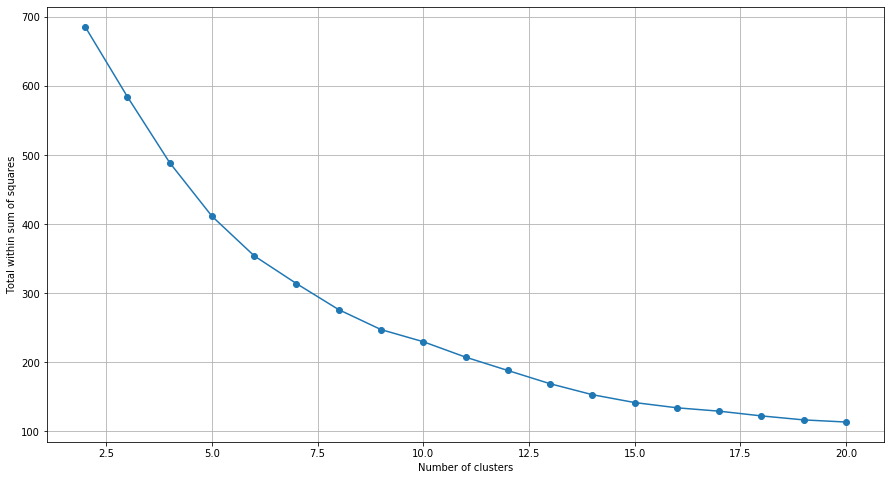

In [21]:
plt.figure(figsize=(15,8))
plt.plot(list(wss.keys()),list(wss.values()) ,marker='o')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Total within sum of squares')
plt.show()

In [22]:
best_kmeans = KMeans(n_clusters=9, random_state=1240)
best_kmeans.fit(scaled_cereals)
best_kmeans_labels = best_kmeans.predict(scaled_cereals)

In [23]:
kmeans_results = pd.DataFrame({"label":cereal_label,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head()

,label,kmeans_cluster
0,100%_Bran (3 - 68.4),7
1,100%_Natural_Bran (3 - 33.98),1
2,All-Bran (3 - 59.43),7
3,All-Bran_with_Extra_Fiber (3 - 93.7),7
4,Almond_Delight (3 - 34.38),3


In [24]:
cereals = pd.read_csv("input/Cereals.csv")
cereals['label'] = cereals['name']+ ' (' +cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)
final_cluster_data = pd.merge(cereals, kmeans_results, on='label')
final_cluster_data.head(10)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label,kmeans_cluster
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.00,0.33,100%_Bran (3 - 68.4),7
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.00,1.00,100%_Natural_Bran (3 - 33.98),1
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.00,0.33,All-Bran (3 - 59.43),7
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.00,0.50,All-Bran_with_Extra_Fiber (3 - 93.7),7
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.00,0.75,Almond_Delight (3 - 34.38),3
5,110,2,2,180,1.5,10.5,10.0,70.0,25,1.00,0.75,Apple_Cinnamon_Cheerios (1 - 29.51),3
6,110,2,0,125,1.0,11.0,14.0,30.0,25,1.00,1.00,Apple_Jacks (2 - 33.17),3
7,130,3,2,210,2.0,18.0,8.0,100.0,25,1.33,0.75,Basic_4 (3 - 37.04),0
8,90,2,1,200,4.0,15.0,6.0,125.0,25,1.00,0.67,Bran_Chex (1 - 49.12),6
9,90,3,0,210,5.0,13.0,5.0,190.0,25,1.00,0.67,Bran_Flakes (3 - 53.31),6


In [25]:
final_cluster_data.kmeans_cluster.value_counts()

3    21
6    13
1     9
0     9
4     8
2     7
5     5
7     3
8     2
Name: kmeans_cluster, dtype: int64

In [26]:
analysis = final_cluster_data.groupby(['kmeans_cluster']).mean().reset_index()
print(analysis)

   kmeans_cluster    calories   protein       fat      sodium      fiber  \
0               0  131.111111  3.000000  1.444444  194.444444   3.833333   
1               1  117.777778  3.555556  2.777778  100.555556   2.688889   
2               2  108.571429  1.857143  0.285714  261.428571   0.285714   
3               3  110.952381  1.476190  1.047619  166.190476   0.547619   
4               4   92.500000  2.750000  0.125000   11.875000   2.375000   
5               5  112.000000  2.600000  0.800000  212.000000   1.400000   
6               6  100.769231  3.307692  0.692308  202.692308   2.576923   
7               7   63.333333  4.000000  0.666667  176.666667  11.000000   
8               8   50.000000  1.500000  0.000000    0.000000   0.500000   

       carbo     sugars      potass    vitamins   weight      cups  
0  15.055556  11.111111  181.111111   33.333333  1.35000  0.705556  
1  12.312500   7.750000  131.666667   19.444444  1.00000  0.685556  
2  21.571429   2.714286   36.428

In [27]:
linkage_matrix = linkage(scaled_cereals, method='ward',metric='euclidean')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [82.5, 82.5, 113.75, 113.75],
  [60.0, 60.0, 98.125, 98.125],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [170.0, 170.0, 193.75, 193.75],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [233.75, 233.75, 273.75, 273.75],
  [181.875, 181.875, 253.75, 253.75],
  [150.0, 150.0, 217.8125, 217.8125],
  [79.0625, 79.0625, 183.90625, 183.90625],
  [40.0, 40.0, 131.484375, 131.484375],
  [12.5, 12.5, 85.7421875, 85.7421875],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 

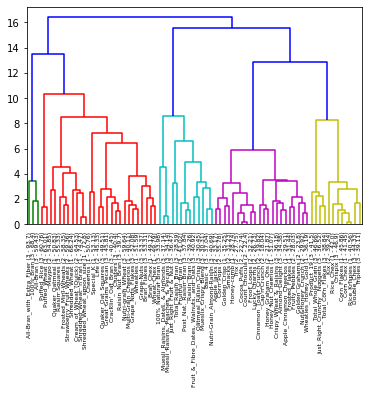

In [28]:
dendrogram(linkage_matrix,labels=cereal_label.values)

In [29]:
agg_clust = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
agg_clusters = agg_clust.fit_predict(scaled_cereals)
agg_result = pd.DataFrame({"label":cereal_label,"agg_cluster":agg_clusters}).sort_values('agg_cluster')
agg_result.head()

,label,agg_cluster
49,Nutri-Grain_Almond-Raisin (3 - 40.69),0
1,100%_Natural_Bran (3 - 33.98),0
46,Mueslix_Crispy_Blend (3 - 30.31),0
45,"Muesli_Raisins,_Peaches,_&_Pecans (3 - 34.14)",0
44,"Muesli_Raisins,_Dates,_&_Almonds (3 - 37.14)",0
